# 1. 요약 : 절차


## 1.1 데이터 준비

  - load_digits
  - load_wine
  - load_breast_cancer
  

## 1.2 데이터 이해하기

  - Feature Data 지정하기
  - Label Data 지정하기
  - Target Names 출력해 보기
  - 데이터 Describe 해 보기
  

## 1.3 train, test 데이터 분리

  - Data Split
  - X_train, X_test, y_train, y_test를 생성  
  
dataset | x_train | x_test
---|---|---
digits | 1437 | 360 
wine | 142 | 36 
breast_cancer | 455 | 114 
   
  
  

## 1.4 다양한 모델로 학습시켜보기
  - Decision Tree 사용해 보기
  - Random Forest 사용해 보기
  - SVM 사용해 보기
  - SGD Classifier 사용해 보기
  - Logistic Regression 사용해 보기


# 2. 결과


## 2.1 각 데이터 셋별 평가 분석

  - **average=macro** says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.  
  
  - **average=weighted** says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.  
    
    
  
  
  - digits : 정확도(accuracy)가 중요하다고 생각됨.
  
digits | DecisionTree | RandomForest | SVM | SGD | LogisticReg
---|---|---|---|---|---
accuracy | 0.86 | 0.96 | **0.99** | 0.93 | 0.95 
precision | 0.86 | 0.97 | **0.99** | 0.94 | 0.95 
recall | 0.86 | 0.96 | **0.99** | 0.93 | 0.95
f1 score | 0.85 | 0.96 | **0.99** | 0.93 | 0.95
    
      
      
  - wine : 정밀도(precision)
  
digits | DecisionTree | RandomForest | SVM | SGD | LogisticReg
---|---|---|---|---|---
accuracy | 0.92 | **1.00** | 0.72 | 0.72 | 0.97
precision | 0.92 | **1.00** | 0.76 | 0.58 | 0.97
recall | 0.92 | **1.00** | 0.72 | 0.72 | 0.97
f1 score | 0.92 | **1.00** | 0.74 | 0.64 | 0.97
      
        
        
  - breast_cancer : 재현율(recall)이 중요
    - 실제 암인데 암이라고 판단하는 진단의 정확성인 재현율 지표가 중요  

digits | DecisionTree | RandomForest | SVM | SGD | LogisticReg
---|---|---|---|---|---
accuracy | 0.92 | **0.94** | 0.91 | 0.89 | 0.91
precision | 0.92 | **0.94** | 0.92 | 0.90 | 0.91
recall | 0.92 | **0.94** | 0.91 | 0.89 | 0.91
f1 score | 0.92 | **0.94** | 0.91 | 0.89 | 0.91
      
        
  - wine과 breast_cancer의 전체 데이터 수량이 적어 정확한 평가가 어려움
        
    
## 2.2 confusion matrix 
 Actual \ Predict | Positive | Negative
---|---|---
P | TP | FN 
N | FP | TN 

  - 정확도(accuracy) : $\frac{TP + TN}{TP+TN+FP+FN}$
  - 정밀도(precision) : $\frac{TP}{TP+FP}$
  - 재현율(recall) : $\frac{TP}{TP+FN}$  
  
    
      
      
  - confusion matrix는 TP, FN, FP, TN을 2x2 행렬로 표기  
      
        
        
    

  - 다중 클래스에서 F1 score 구하는 방법
    - digits : 10x10
    - wine : 3x3
    - breast_cancer : 2x2

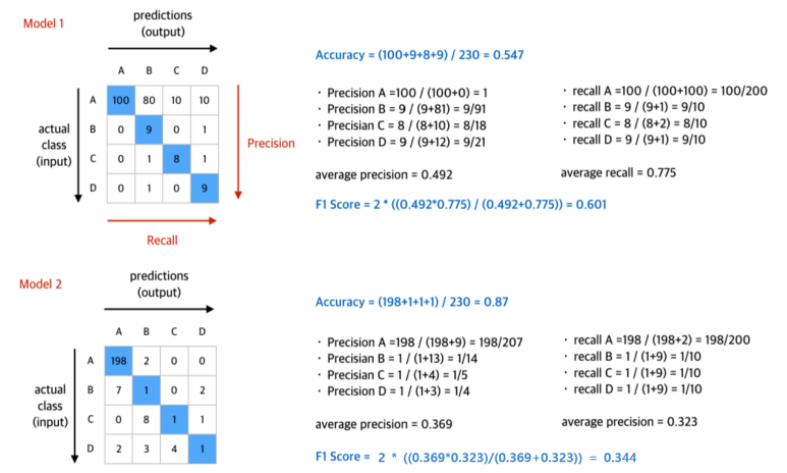

## 회고

  - 부족한 점
    - 데이터를 꼼꼼히 살펴보지 못함
    - 각 특성(feature)별로 연관관계 등을 따져보지 못함
    - 그 특성들을 시각화하고 설명하는 부분이 모자람
    
  - 특성 분석을 한 후 데이터 전처리 필요하지만 실행못함.
  
  - 프로젝트를 진행할수록 부족한 점들을 많이 발견하게 됨
    - 다음 프로젝트에서 좀더 성실하게 진행하고자 각오를 다짐.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
#from sklearn.tree import DecisionTreeClassifier

def dt(data_name):
    
    decision_tree = DecisionTreeClassifier(random_state=32)
    print(decision_tree._estimator_type)

    decision_tree.fit(X_train, y_train)
    
    y_pred = decision_tree.predict(X_test)
    
    print(data_name + " DecisionTree")

    print(classification_report(y_test, y_pred))

    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

    if data_name == "digits":
        n_samples = len(digits.images)
        images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
        for index, (image, prediction) in enumerate(images_and_predictions[:4]):
            plt.subplot(2, 4, index + 5)
            plt.axis('off')
            plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title('Prediction: %i' % prediction)

            plt.show()

In [5]:
#from sklearn.ensemble import RandomForestClassifier

def rf(data_name):
    
    random_forest = RandomForestClassifier(random_state=32)
    random_forest.fit(X_train, y_train)

    y_pred = random_forest.predict(X_test)

    print(data_name + " RandomForest")
    
    print(classification_report(y_test, y_pred))
    

    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

    if data_name == "digits":
        n_samples = len(digits.images)
        images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
        for index, (image, prediction) in enumerate(images_and_predictions[:4]):
            plt.subplot(2, 4, index + 5)
            plt.axis('off')
            plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title('Prediction: %i' % prediction)

            plt.show()

In [6]:
#from sklearn import svm

def sv(data_name):
    
    svm_model = svm.SVC()

    print(svm_model._estimator_type)

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    
    print(data_name, " SVC")

    print(classification_report(y_test, y_pred))
    
    
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

    if data_name == "digits":
        n_samples = len(digits.images)
        images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
        for index, (image, prediction) in enumerate(images_and_predictions[:4]):
            plt.subplot(2, 4, index + 5)
            plt.axis('off')
            plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title('Prediction: %i' % prediction)

            plt.show()

In [7]:
#from sklearn.linear_model import SGDClassifier
def sgd(data_name):
    
    sgd_model = SGDClassifier()

    print(sgd_model._estimator_type)

    sgd_model.fit(X_train, y_train)
    y_pred = sgd_model.predict(X_test)
    
    print(data_name + " SGD")

    print(classification_report(y_test, y_pred))
    
    
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

    if data_name == "digits":
        n_samples = len(digits.images)
        images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
        for index, (image, prediction) in enumerate(images_and_predictions[:4]):
            plt.subplot(2, 4, index + 5)
            plt.axis('off')
            plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title('Prediction: %i' % prediction)

            plt.show()

In [8]:
#from sklearn.linear_model import LogisticRegression

def lg(data_name):
    
    logistic_model = LogisticRegression()

    print(logistic_model._estimator_type)

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    print(data_name + " LogisticRegression")

    print(classification_report(y_test, y_pred))
    
    
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
    
    if data_name == "digits":
        n_samples = len(digits.images)
        images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
        for index, (image, prediction) in enumerate(images_and_predictions[:4]):
            plt.subplot(2, 4, index + 5)
            plt.axis('off')
            plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title('Prediction: %i' % prediction)

        plt.show()

In [9]:
digits = load_digits()

In [10]:
digits_data = digits.data

In [11]:
digits_label = digits.target

In [12]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)

In [13]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


classifier
digits DecisionTree
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

Confusion matrix:
[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  

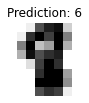

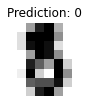

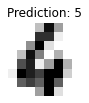

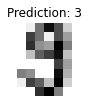

In [16]:
dt("digits")

digits RandomForest
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0 

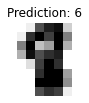

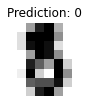

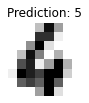

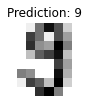

In [17]:
rf("digits")

classifier
digits  SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [

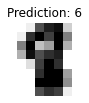

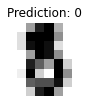

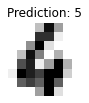

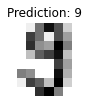

In [18]:
sv("digits")

classifier
digits SGD
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.83      0.93      0.88        42
           2       0.97      0.97      0.97        40
           3       0.94      0.97      0.96        34
           4       0.95      1.00      0.97        37
           5       0.96      0.96      0.96        28
           6       0.93      0.93      0.93        28
           7       0.91      0.97      0.94        33
           8       0.97      0.74      0.84        43
           9       0.88      0.91      0.89        32

    accuracy                           0.93       360
   macro avg       0.94      0.94      0.93       360
weighted avg       0.94      0.93      0.93       360

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 39  0  1  0  0  0  0  0  2]
 [ 0  0 39  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 

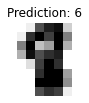

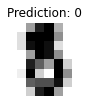

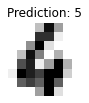

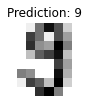

In [19]:
sgd("digits")

classifier
digits LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  1  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


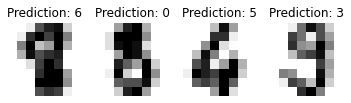

In [20]:
lg("digits")

In [21]:
wine = load_wine()

In [22]:
wine_data = wine.data

In [23]:
wine_label = wine.target

In [24]:
wine_data, wine_label, wine.feature_names

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [25]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [26]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [27]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2,
                                                    random_state=25)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [28]:
dt("wine")

classifier
wine DecisionTree
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.94      0.89      0.91        18
           2       0.88      1.00      0.93         7

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36

Confusion matrix:
[[10  1  0]
 [ 1 16  1]
 [ 0  0  7]]


In [29]:
rf("wine")

wine RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion matrix:
[[11  0  0]
 [ 0 18  0]
 [ 0  0  7]]


In [30]:
sv("wine")

classifier
wine  SVC
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.82      0.78      0.80        18
           2       0.40      0.57      0.47         7

    accuracy                           0.72        36
   macro avg       0.70      0.69      0.69        36
weighted avg       0.76      0.72      0.74        36

Confusion matrix:
[[ 8  0  3]
 [ 1 14  3]
 [ 0  3  4]]


In [31]:
sgd("wine)")

classifier
wine) SGD
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.71      0.94      0.81        18
           2       0.00      0.00      0.00         7

    accuracy                           0.72        36
   macro avg       0.49      0.59      0.53        36
weighted avg       0.58      0.72      0.64        36

Confusion matrix:
[[ 9  2  0]
 [ 1 17  0]
 [ 2  5  0]]


C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
lg("wine")

classifier
wine LogisticRegression
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00         7

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Confusion matrix:
[[11  0  0]
 [ 1 17  0]
 [ 0  0  7]]


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
breast_cancer = load_breast_cancer()

In [34]:
breast_cancer_data = breast_cancer.data

In [35]:
breast_cancer_label = breast_cancer.target

In [36]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


In [39]:
dt("brease_cancer")

classifier
brease_cancer DecisionTree
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.93      0.95      0.94        75

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Confusion matrix:
[[34  5]
 [ 4 71]]


In [40]:
rf("brease_cancer")

brease_cancer RandomForest
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.95      0.96      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
[[35  4]
 [ 3 72]]


In [41]:
sv("brease_cancer")

classifier
brease_cancer  SVC
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        39
           1       0.89      0.99      0.94        75

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
[[30  9]
 [ 1 74]]


In [42]:
sgd("breast_cancer")

classifier
breast_cancer SGD
              precision    recall  f1-score   support

           0       0.97      0.72      0.82        39
           1       0.87      0.99      0.93        75

    accuracy                           0.89       114
   macro avg       0.92      0.85      0.87       114
weighted avg       0.90      0.89      0.89       114

Confusion matrix:
[[28 11]
 [ 1 74]]


In [43]:
lg("brease_cancer")

classifier
brease_cancer LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.93      0.93      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Confusion matrix:
[[34  5]
 [ 5 70]]


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
